In [106]:
import matplotlib.pyplot as plt 
import scipy.misc
import numpy as np

from keras.layers import Dense, Dropout, Flatten, Input, Conv2D, Cropping2D
from keras.layers import MaxPooling2D, ZeroPadding2D, BatchNormalization
from keras.models import Model
from keras.utils.layer_utils import print_summary
from keras.preprocessing.image import ImageDataGenerator

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


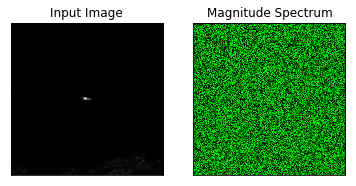

In [10]:
import cv2

img = cv2.imread('/home/ubuntu/data/sar/train/valid_3classes_240/other/S1A_IW_GRDH_1SDV_20170214T062124_20170214T062149_015276_019087_AF6B_terrain_correction_2.png')

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


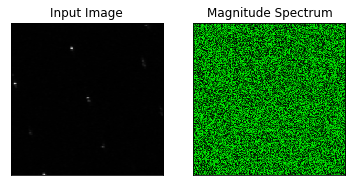

In [9]:
img =[]
f = []
img = cv2.imread('/home/ubuntu/data/sar/train/train_3classes_240/turbine/S1A_IW_GRDH_1SDV_20170119T174904_20170119T174929_014904_018511_9827_terrain_correction_1.png')

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum1 = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum1, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()



In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/home/ubuntu/data/sar/train/train_3classes_140',
        target_size=(140, 140),
        batch_size=20,
        class_mode='categorical', 
        color_mode='grayscale')


validation_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/data/sar/train/valid_3classes_140', 
        target_size=(140, 140),
        shuffle=False,
        batch_size=10,
        class_mode='categorical',
        color_mode='grayscale')

In [160]:
# simple model saved weights

input_shape = (140, 140, 1)

classifier_input = Input(shape=input_shape)

p = 0.5
num_classes = 3

x = Cropping2D(cropping=((10, 10), (10, 10)))(classifier_input)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D()(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
# x = Dropout(p/2)(x)
x = Flatten()(x)
# x = Dense(128, activation='relu')
# x = Dropout(p)(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(outputs=x, inputs=classifier_input)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [161]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        (None, 140, 140, 1)       0         
_________________________________________________________________
cropping2d_3 (Cropping2D)    (None, 120, 120, 1)       0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 120, 120, 32)      320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 30, 30, 64)        36928     
__________

In [162]:
model.optimizer.lr = 0.0001

In [168]:
model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=60)

Epoch 1/1
100/100 [==============================] - 55s - loss: 0.1566 - acc: 0.9440 - val_loss: 0.2664 - val_acc: 0.9033


In [169]:
model.save_weights('/home/ubuntu/data/sar/weights/simple_model_90valid.h5')

In [79]:
input_shape = (140, 140, 1)

classifier_input = Input(shape=input_shape)

p = 0.5
num_classes = 3

x = Conv2D(32, (3, 3), activation='relu', padding='same')(classifier_input)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization(axis=1)(x)
x = MaxPooling2D()(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Dropout(p/2)(x)
x = Flatten()(x)
# x = Dense(128, activation='relu')
# x = Dropout(p)(x)
x = Dense(num_classes, activation='softmax')(x)

model2 = Model(outputs=x, inputs=classifier_input)
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [80]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        (None, 140, 140, 1)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 140, 140, 32)      320       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 140, 140, 64)      18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 140, 140, 64)      560       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 70, 70, 64)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 70, 70, 128)       73856     
_________________________________________________________________
dropout_13 (Dropout)         (None, 70, 70, 128)       0         
__________

In [82]:
model.optimizer.lr = 0.001

In [83]:
model2.fit_generator(
        train_generator,
        steps_per_epoch=50,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=30)

Epoch 1/1
50/50 [==============================] - 504s - loss: 7.7367 - acc: 0.5200 - val_loss: 5.6657 - val_acc: 0.3333


In [120]:
preds = model.predict_generator(validation_generator,60)
preds.shape

(600, 3)

In [147]:
preds[0:100]

array([[  1.73124205e-03,   1.89667195e-01,   8.08601558e-01],
       [  6.09030994e-03,   2.39458874e-01,   7.54450798e-01],
       [  8.22165888e-03,   3.78294922e-02,   9.53948796e-01],
       [  2.73234665e-01,   3.15282404e-01,   4.11482930e-01],
       [  3.24940174e-07,   1.52573546e-06,   9.99998093e-01],
       [  7.53238518e-03,   9.89391748e-03,   9.82573688e-01],
       [  6.70926170e-07,   7.59603779e-07,   9.99998569e-01],
       [  4.57632268e-06,   6.97984578e-05,   9.99925613e-01],
       [  2.53916089e-03,   6.43781871e-02,   9.33082640e-01],
       [  2.09340304e-02,   1.10687904e-01,   8.68378103e-01],
       [  7.04663107e-03,   5.45067549e-01,   4.47885782e-01],
       [  1.70208737e-01,   4.25731093e-01,   4.04060185e-01],
       [  5.09870350e-02,   9.39260542e-01,   9.75247659e-03],
       [  2.49749954e-09,   1.72752646e-10,   1.00000000e+00],
       [  2.89145845e-07,   7.59561317e-07,   9.99998927e-01],
       [  6.79462999e-02,   6.61344528e-01,   2.7070906

In [149]:
# need to figure out why the class indicies don't seem to match

validation_generator.class_indices, train_generator.class_indices


({'oil_platform': 0, 'other': 1, 'turbine': 2},
 {'oil_platform': 0, 'other': 1, 'turbine': 2})

In [148]:
validation_generator.filenames[0:100]

['oil_platform/S1A_IW_GRDH_1SDV_20170216T060554_20170216T060619_015305_01916C_72E0_terrain_correction_65.png',
 'oil_platform/S1B_IW_GRDH_1SDV_20170301T055652_20170301T055717_004511_007DA6_32F5_terrain_correction_2_rot90.png',
 'oil_platform/S1B_IW_GRDH_1SDV_20170301T055652_20170301T055717_004511_007DA6_32F5_terrain_correction_106.png',
 'oil_platform/S1A_IW_GRDH_1SDV_20170211T055802_20170211T055827_015232_018F2B_FA97_terrain_correction_5.png',
 'oil_platform/S1A_IW_GRDH_1SDV_20170216T060554_20170216T060619_015305_01916C_72E0_terrain_correction_86_rot90.png',
 'oil_platform/S1A_IW_GRDH_1SDV_20170216T060554_20170216T060619_015305_01916C_72E0_terrain_correction_106_rot180.png',
 'oil_platform/S1A_IW_GRDH_1SDV_20170211T055802_20170211T055827_015232_018F2B_FA97_terrain_correction_6_rot90.png',
 'oil_platform/S1B_IW_GRDH_1SDV_20170301T055652_20170301T055717_004511_007DA6_32F5_terrain_correction_63.png',
 'oil_platform/S1A_IW_GRDH_1SDV_20170216T060554_20170216T060619_015305_01916C_72E0_terra